In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### f_pixel test

: 광각 값에 따른 f_pixel 값 변화 확인 

In [1]:
def cal_fpixel(frame_width, alpha): 
    f_pixel = (frame_width * 0.5) / np.tan(alpha * 0.5 * np.pi/180)
    return f_pixel 

In [4]:
print(cal_fpixel(640, 72)) 
print(cal_fpixel(640, 78)) 
print(cal_fpixel(640, 90)) 

440.4422145507756
395.1670900912165
320.00000000000006


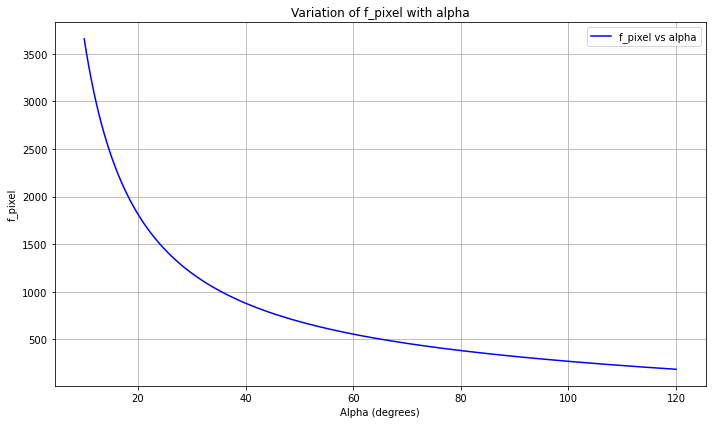

In [6]:
# 여러 alpha 값들에 대해 f_pixel 값을 계산
alphas = np.linspace(10, 120, 500)  # 10도부터 120도까지 500개의 점을 사용해 그래프를 그립니다.
f_pixels = [cal_fpixel(640, alpha) for alpha in alphas]

plt.figure(figsize=(10, 6))
plt.plot(alphas, f_pixels, label='f_pixel vs alpha', color='blue')
plt.title('Variation of f_pixel with alpha')
plt.xlabel('Alpha (degrees)')
plt.ylabel('f_pixel')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# 72~90 alpha 범위에서 f_pixel 범위 test
alphas_range = np.linspace(72, 90, 500)
f_pixels_range = [cal_fpixel(640, alpha) for alpha in alphas_range]

# 해당 범위 내의 최소 및 최대 f_pixel 값을 찾습니다.
min_f_pixel = min(f_pixels_range)
max_f_pixel = max(f_pixels_range)

print(f"Between 72 and 90 degrees of alpha:")
print(f"Minimum f_pixel value: {min_f_pixel:.2f}")
print(f"Maximum f_pixel value: {max_f_pixel:.2f}")

Between 72 and 90 degrees of alpha:
Minimum f_pixel value: 320.00
Maximum f_pixel value: 440.44


### zdepth test

In [8]:
def cal_zdepth(f_pixel, baseline, disparity): 
    # f_pixel [pixel] , baseline [cm] , disparity [pixel]  
    z_depth = (f_pixel * baseline) / disparity 
    return z_depth  # [cm]

zdepth를 구할 때 실제 환경에 대한 하이퍼파라미터는 f_pixel(alpha에 의한 영향)과 baseline 측정값이 해당함. <br>
따라서 이들에 대한 값 변화에 따른 zdepth 값 변화를 파악하면, 어떤 하이퍼파라미터가 큰 오차를 유발하는지 파악할 수 있을 것이라 기대.

1. f_pixel 에 따른 zdepth 변화 test 

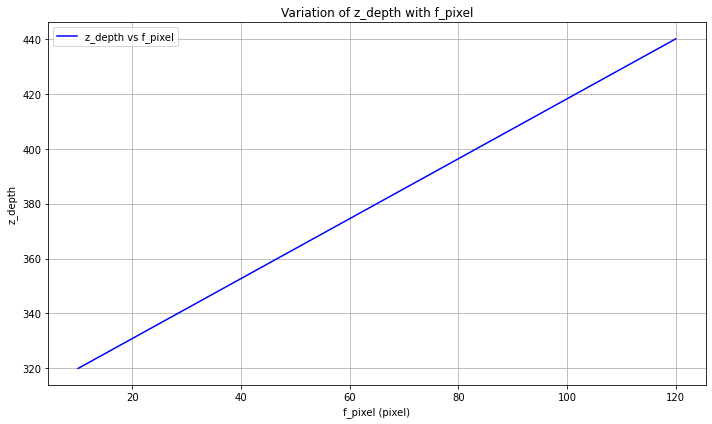

In [10]:
# 여러 f_pixel 값들에 대해 z_depth 값을 계산
f_pixels = np.linspace(320, 440, 500)  # 320 ~ 440 까지 500개의 점을 사용해 그래프를 그립니다.
baseline = 20 
disparity = 4 
z_depths = [cal_zdepth(f_pixel, baseline, disparity) for f_pixel in f_pixels]

plt.figure(figsize=(10, 6))
plt.plot(alphas, f_pixels, label='z_depth vs f_pixel', color='blue')
plt.title('Variation of z_depth with f_pixel')
plt.xlabel('f_pixel (pixel)')
plt.ylabel('z_depth')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

-> 오... 생각해보니 관계는 식에서 바로 알 수 있네..???? 허허 

In [11]:
# 320 ~ 440 f_pixel 범위에서 z_depth 범위 test
f_pixels_range = np.linspace(320, 440, 500)
baseline = 20 
disparity = 4 
z_depths_range = [cal_zdepth(f_pixel, baseline, disparity) for f_pixel in f_pixels_range]

# 해당 범위 내의 최소 및 최대 f_pixel 값을 찾습니다.
min_z_depth = min(z_depths_range)
max_z_depth = max(z_depths_range)

print(f"Between 320 and 440 of f_pixel:")
print(f"Minimum z_depth value: {min_z_depth:.2f}")
print(f"Maximum z_depth value: {max_z_depth:.2f}")

Between 320 and 440 of f_pixel:
Minimum z_depth value: 1600.00
Maximum z_depth value: 2200.00


2. baseline 변화에 따른 zdepth 변화 test 

3. f_pixel & baseline 동시 변화에 따른 zdepth 변화 test 

### x 보정 test

In [9]:
xl_xdisparity_data = [
[[78, 69], [73, 70], [69, 70], [64, 68], [58, 68]],        # z = 66.1
[[111, 59], [108, 59], [106, 57], [101, 58], [99, 57]],    # z = 60.1
[[118, 49], [116, 49], [115, 48], [113, 49], [111, 48]],   # z = 54.1
[[117, 42], [118, 42], [118, 41], [118, 40], [117, 39]],   # z = 48.1
[[129, 34], [128, 35], [128, 33], [126, 34], [126, 34]],   # z = 42.1
[[159, 32], [161, 30], [164, 28], [165, 28], [166, 29]],   # z = 38
[[178, 24], [180, 23], [181, 23], [181, 24], [183, 23]],   # z = 32
[[175, 19], [175, 19], [177, 16], [176, 18], [176, 18]],   # z = 26
[[177, 15], [177, 13], [177, 13], [176, 13], [176, 13]],   # z = 20
[[187, 10], [187, 8], [186, 8], [185, 8], [185, 8]]]       # z = 14